In [299]:
import pymysql
from sklearn.ensemble import RandomForestClassifier
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pandasql import sqldf
from sklearn import metrics
from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

In [812]:
data = pd.read_csv("../../FEATURE_ENGINEER/tablon_uppert_70_q3.csv").drop(
    columns=["ID", "DATE_MATCH", "TEAM_HOME", "TEAM_AWAY", "LEAGUE_INGLATERRA", "Unnamed: 0",
            "FAVOURITE_IS_HOME", "LEAGUE_ALEMANIA", "FAVOURITE_IS_AWAY", "LEAGUE_FRANCIA", "LEAGUE_ITALIA",
            "NUM_SAVESAWAY_L45", "AVG_CORNERSAWAY2_L3", "CORNERS_H_45_60", "CORNERS_DANGATTACKS_L45", "CORNERS_A",
            "TEMPERATURE", "NUM_DANGATTACKSAWAY_L45", "NUM_DANGATTACKSHOME_L45", "NUM_FOULSAWAY_L45", "NUM_ATTACKSHOME_L45",
            "NUM_TACKLEHOME_L45", "POSESSION_AWAY_L45", "IS_FAVOURITE_DRAWING", "SUM_GOALS_L60", "AVG_CORNERS_LOSE_AWAY",
            "AVG_CORNERSAWAYR2_L5", "AVG_CORNERSHOME2_L3","AVG_CORNERSHOMER2_L5","CORNERS_A_45_60","AVG_CORNERSHOME1_L3",
            "AVG_CORNERSHOME2_L5", "AVG_CORNERSAWAYR1_L3", "LEAGUE_ESPANA", "GOALS_A",
            "NUM_MATCHESAWAY_POSITIVE_L5", "NUM_SHOTSHOME_L45","WIND","RAIN"], 
    axis=1)

data = data[(data.TOTAL_CORNERS>3) & (data.TOTAL_CORNERS<9)].drop(columns=["TOTAL_CORNERS"],axis=1)

tablon = data[data.YEARMONTH<202109].drop(columns=["YEARMONTH"],axis=1)


X_validation = data[(data.YEARMONTH>=202109) & (data.YEARMONTH<202111)].drop(columns=["YEARMONTH"],axis=1)
y_validation = X_validation.pop("output")


X_validation_november = data[data.YEARMONTH>=202111].drop(columns=["YEARMONTH"],axis=1)
y_validation_november = X_validation_november.pop("output")

In [813]:
len_test = int(round(len(tablon)*0.2, 0))
len_train = int(round(len(tablon)*0.8, 0))

X_train = tablon[len_test:]
y_train = X_train.pop("output")
X_test = tablon[:len_test]
y_test = X_test.pop("output")

In [814]:
X_train.shape, X_test.shape, X_validation.shape

((5326, 56), (1332, 56), (232, 56))

In [815]:
y_train.value_counts()

1    3297
0    2029
Name: output, dtype: int64

In [816]:
y_test.value_counts()

1    783
0    549
Name: output, dtype: int64

In [817]:
y_validation.value_counts()

1    146
0     86
Name: output, dtype: int64

## EXECUTING BEST MODEL

In [818]:
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=130, max_depth=6, gamma=1.25, eta=0.015,
                          min_child_weight=30, colsample_bytree=0.65, 
                          random_state=123, eval_metric=["auc", "logloss", "error"])
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

/home/root/opt/python3.7.11/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.56809	validation_0-logloss:0.69217	validation_0-error:0.41216
[1]	validation_0-auc:0.56650	validation_0-logloss:0.69127	validation_0-error:0.41366
[2]	validation_0-auc:0.56133	validation_0-logloss:0.69041	validation_0-error:0.41517
[3]	validation_0-auc:0.56369	validation_0-logloss:0.68956	validation_0-error:0.41216
[4]	validation_0-auc:0.56849	validation_0-logloss:0.68869	validation_0-error:0.41517
[5]	validation_0-auc:0.56705	validation_0-logloss:0.68791	validation_0-error:0.40916
[6]	validation_0-auc:0.56899	validation_0-logloss:0.68714	validation_0-error:0.40691
[7]	validation_0-auc:0.56695	validation_0-logloss:0.68642	validation_0-error:0.40691
[8]	validation_0-auc:0.56175	validation_0-logloss:0.68576	validation_0-error:0.40465
[9]	validation_0-auc:0.56367	validation_0-logloss:0.68506	validation_0-error:0.40315
[10]	validation_0-auc:0.56405	validation_0-logloss:0.68444	validation_0-error:0.40465
[11]	validation_0-auc:0.56705	validation_0-logloss:0.68373	valid

[96]	validation_0-auc:0.57477	validation_0-logloss:0.66453	validation_0-error:0.41291
[97]	validation_0-auc:0.57557	validation_0-logloss:0.66431	validation_0-error:0.41141
[98]	validation_0-auc:0.57563	validation_0-logloss:0.66425	validation_0-error:0.41216
[99]	validation_0-auc:0.57583	validation_0-logloss:0.66424	validation_0-error:0.41216
[100]	validation_0-auc:0.57593	validation_0-logloss:0.66425	validation_0-error:0.41216
[101]	validation_0-auc:0.57608	validation_0-logloss:0.66417	validation_0-error:0.41141
[102]	validation_0-auc:0.57598	validation_0-logloss:0.66420	validation_0-error:0.41216
[103]	validation_0-auc:0.57696	validation_0-logloss:0.66402	validation_0-error:0.41066
[104]	validation_0-auc:0.57653	validation_0-logloss:0.66400	validation_0-error:0.40991
[105]	validation_0-auc:0.57642	validation_0-logloss:0.66402	validation_0-error:0.41141
[106]	validation_0-auc:0.57691	validation_0-logloss:0.66390	validation_0-error:0.41291
[107]	validation_0-auc:0.57739	validation_0-log

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.65,
              enable_categorical=False, eta=0.015,
              eval_metric=['auc', 'logloss', 'error'], gamma=1.25, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.0149999997, max_delta_step=0, max_depth=6,
              min_child_weight=30, missing=nan, monotone_constraints='()',
              n_estimators=130, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<AxesSubplot:>

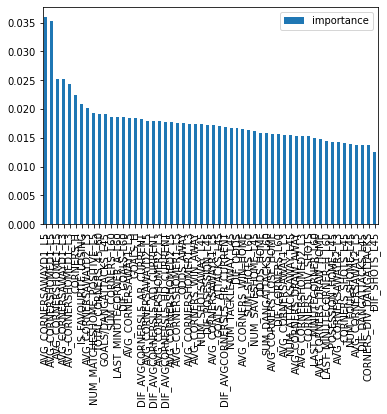

In [820]:
fu_dict = dict(zip(X_train.columns, model.feature_importances_))
fi = pd.DataFrame(fu_dict.values(), index=fu_dict.keys(), columns=["importance"])
fi = fi.sort_values(by="importance", ascending=False)

fi.plot.bar()

In [821]:
y_pred1 = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
cm

array([[ 33, 516],
       [ 33, 750]])

In [847]:
y_pred_proba = model.predict_proba(X_test)[:,1]
predict_mine = np.where(y_pred_proba > 0.625, 1, 0)
cm1 = confusion_matrix(y_test, predict_mine)

In [848]:
cm1

array([[463,  86],
       [567, 216]])

In [849]:
metrics.accuracy_score(y_test, y_pred1)

0.5878378378378378

In [850]:
cm1[1][1]/(cm1[1][1]+cm1[0][1]), cm[0][0]/(cm[1][0]+cm[0][0])

(0.7152317880794702, 0.5)

In [851]:
(cm1[1][1]+cm1[0][1])/len(y_test)*100, (cm[0][0]+cm[1][0])/len(y_test)*100

(22.67267267267267, 4.954954954954955)

##### VALIDATION - BEST MODEL --> 70% accuracy in 17% of matches

In [852]:
y_pred = model.predict(X_validation)
cm = confusion_matrix(y_validation, y_pred)
cm

array([[  5,  81],
       [  4, 142]])

In [853]:
metrics.accuracy_score(y_validation, y_pred)

0.6336206896551724

In [854]:
y_pred_proba = model.predict_proba(X_validation)[:,1]
predict_mine = np.where(y_pred_proba > 0.625, 1, 0)
cm1 = confusion_matrix(y_validation, predict_mine)

In [855]:
cm1[1][1]/(cm1[1][1]+cm1[0][1]), cm[0][0]/(cm[1][0]+cm[0][0])

(0.7558139534883721, 0.5555555555555556)

In [856]:
(cm1[1][1]+cm1[0][1])/len(y_validation)*100, (cm[0][0]+cm[1][0])/len(y_validation)*100

(37.06896551724138, 3.8793103448275863)

In [857]:
cm1

array([[65, 21],
       [81, 65]])

## FINAL VALIDATION - NOVEMBER 2021

In [858]:
y_pred = model.predict(X_validation_november)
cm = confusion_matrix(y_validation_november, y_pred)
cm

array([[ 0, 54],
       [ 1, 83]])

In [859]:
metrics.accuracy_score(y_validation_november, y_pred)

0.6014492753623188

In [860]:
y_pred_proba = model.predict_proba(X_validation_november)[:,1]
predict_mine = np.where(y_pred_proba > 0.62, 1, 0)
cm1 = confusion_matrix(y_validation_november, predict_mine)

In [861]:
cm1

array([[42, 12],
       [55, 29]])

In [862]:
cm1[1][1]/(cm1[1][1]+cm1[0][1]), cm[0][0]/(cm[1][0]+cm[0][0])

(0.7073170731707317, 0.0)

In [863]:
(cm1[1][1]+cm1[0][1])/len(y_validation_november)*100, (cm[0][0]+cm[1][0])/len(y_validation_november)*100

(29.71014492753623, 0.7246376811594203)

In [864]:
#umbral --> 0.605; Condition --> TOTAL_CORNERS > 2
import pickle
file_name = "model_under3_70.pkl"

# save
pickle.dump(model, open(file_name, "wb"))

# load
#xgb_model_loaded = pickle.load(open(file_name, "rb"))


# OUTPUT

In [130]:
output = data[(data.YEARMONTH>=202111 )& (data.TOTAL_CORNERS>3)][["ID", "output", "CORNERS_H", "CORNERS_A", "TOTAL_CORNERS"]].reset_index(drop=True)

In [131]:
output["PROB_CORNERS"] = pd.DataFrame(model.predict_proba(X_validation_november)[:,1]).iloc[:, 0]\
    .apply(lambda x: 1 if x>0.6 else 0)

In [132]:
output[output.PROB_CORNERS==1]

,ID,output,CORNERS_H,CORNERS_A,TOTAL_CORNERS,PROB_CORNERS
0,E30fSmrc,1,5,0,5,1
1,nsYoAO57,1,5,1,6,1
2,p0AwSvlE,1,4,4,8,1
7,Oj9sRb3K,1,4,3,7,1
8,dCFxXoDK,1,2,4,6,1
9,vyLXXRcE,1,4,2,6,1
14,80vLFh5r,0,2,5,7,1
15,fZaDLxRs,0,1,7,8,1
16,ID8oQIIQ,1,5,1,6,1
17,GllMJGef,1,5,4,9,1
